In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def data_processing():
    cifar =  keras.datasets.cifar10
    (X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()
    y_train_full = to_categorical(y_train_full)
    y_test = to_categorical(y_test)
    
    X_train_n = X_train_full / 255
    X_test_n = X_test / 255
    
    X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
    y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
    X_test = X_test_n
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test 

def data_augmentation(xtrain, xval, xtest, ytrain, yval, ytest):
    train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

    test_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow(
                        xtrain, ytrain,
                        batch_size = 64)

    validation_generator = test_datagen.flow(
                            xval, yval,
                            batch_size = 64)
    test_generator = test_datagen.flow(
                            xtest, ytest,
                            batch_size = 64)
    
    return train_generator, validation_generator, test_generator

def create_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape= (32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())

    model.add(layers.Dense(1024, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model
    
def compile_model(loss, optimizer, metrics):    
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    return model
    
def train_model(epochs, steps, callbacks):    
    if callbacks is None:
        history = model.fit(train_generator, steps_per_epoch  = steps, validation_data = validation_generator,
                            epochs = epochs, verbose = 1)
    else:
        history = model.fit(train_generator, steps_per_epoch = steps, validation_data = validation_generator, 
                  epochs = epochs, callbacks = [callbacks], verbose = 1) 
    return history

In [3]:
X_train, X_valid, X_test, y_train, y_valid, y_test = data_processing()
train_generator, validation_generator, test_generator = data_augmentation(X_train, X_valid, X_test, y_train, y_valid, y_test)

loss = "categorical_crossentropy"
optimizer = SGD(learning_rate = 0.001, momentum = 0.9)
metrics = ["accuracy"]
epochs = 400
steps = X_train.shape[0] // 64
callbacks = keras.callbacks.ModelCheckpoint("BEST.h5", save_best_only = True)

In [4]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [5]:
compile_model(loss, optimizer, metrics)
history = train_model(epochs, steps, callbacks)

Epoch 1/400
703/703 [==============================] - 30s 32ms/step - loss: 2.4538 - accuracy: 0.2286 - val_loss: 1.7405 - val_accuracy: 0.3634
Epoch 2/400
703/703 [==============================] - 22s 32ms/step - loss: 1.8730 - accuracy: 0.3074 - val_loss: 1.6242 - val_accuracy: 0.3932
Epoch 3/400
703/703 [==============================] - 23s 33ms/step - loss: 1.7630 - accuracy: 0.3431 - val_loss: 1.6008 - val_accuracy: 0.3996
Epoch 4/400
703/703 [==============================] - 23s 33ms/step - loss: 1.6846 - accuracy: 0.3734 - val_loss: 1.5608 - val_accuracy: 0.4280
Epoch 5/400
703/703 [==============================] - 23s 33ms/step - loss: 1.6232 - accuracy: 0.4004 - val_loss: 1.4694 - val_accuracy: 0.4496
Epoch 6/400
703/703 [==============================] - 23s 33ms/step - loss: 1.5782 - accuracy: 0.4171 - val_loss: 1.3910 - val_accuracy: 0.4890
Epoch 7/400
703/703 [==============================] - 23s 33ms/step - loss: 1.5306 - accuracy: 0.4390 - val_loss: 1.4643 - val_ac

703/703 [==============================] - 23s 33ms/step - loss: 0.8620 - accuracy: 0.6995 - val_loss: 0.7396 - val_accuracy: 0.7458
Epoch 57/400
703/703 [==============================] - 23s 32ms/step - loss: 0.8643 - accuracy: 0.6992 - val_loss: 0.7286 - val_accuracy: 0.7464
Epoch 58/400
703/703 [==============================] - 22s 32ms/step - loss: 0.8556 - accuracy: 0.7024 - val_loss: 0.7245 - val_accuracy: 0.7452
Epoch 59/400
703/703 [==============================] - 23s 32ms/step - loss: 0.8499 - accuracy: 0.7022 - val_loss: 0.7632 - val_accuracy: 0.7334
Epoch 60/400
703/703 [==============================] - 22s 32ms/step - loss: 0.8480 - accuracy: 0.7050 - val_loss: 0.7256 - val_accuracy: 0.7502
Epoch 61/400
703/703 [==============================] - 22s 32ms/step - loss: 0.8408 - accuracy: 0.7101 - val_loss: 0.7287 - val_accuracy: 0.7448
Epoch 62/400
703/703 [==============================] - 23s 32ms/step - loss: 0.8301 - accuracy: 0.7113 - val_loss: 0.7480 - val_accuracy

703/703 [==============================] - 24s 34ms/step - loss: 0.6618 - accuracy: 0.7729 - val_loss: 0.6238 - val_accuracy: 0.7854
Epoch 112/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6625 - accuracy: 0.7720 - val_loss: 0.5775 - val_accuracy: 0.8010
Epoch 113/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6546 - accuracy: 0.7747 - val_loss: 0.5787 - val_accuracy: 0.8008
Epoch 114/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6487 - accuracy: 0.7756 - val_loss: 0.5125 - val_accuracy: 0.8210
Epoch 115/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6489 - accuracy: 0.7752 - val_loss: 0.6453 - val_accuracy: 0.7806
Epoch 116/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6471 - accuracy: 0.7788 - val_loss: 0.6220 - val_accuracy: 0.7852
Epoch 117/400
703/703 [==============================] - 23s 33ms/step - loss: 0.6513 - accuracy: 0.7747 - val_loss: 0.5897 - val_ac

703/703 [==============================] - 23s 33ms/step - loss: 0.5410 - accuracy: 0.8130 - val_loss: 0.4926 - val_accuracy: 0.8324
Epoch 167/400
703/703 [==============================] - 23s 33ms/step - loss: 0.5464 - accuracy: 0.8119 - val_loss: 0.4738 - val_accuracy: 0.8376
Epoch 168/400
703/703 [==============================] - 23s 32ms/step - loss: 0.5431 - accuracy: 0.8127 - val_loss: 0.4657 - val_accuracy: 0.8408
Epoch 169/400
703/703 [==============================] - 23s 33ms/step - loss: 0.5434 - accuracy: 0.8119 - val_loss: 0.4775 - val_accuracy: 0.8410
Epoch 170/400
703/703 [==============================] - 23s 32ms/step - loss: 0.5410 - accuracy: 0.8118 - val_loss: 0.5371 - val_accuracy: 0.8166
Epoch 171/400
703/703 [==============================] - 23s 33ms/step - loss: 0.5388 - accuracy: 0.8152 - val_loss: 0.4777 - val_accuracy: 0.8350
Epoch 172/400
703/703 [==============================] - 23s 33ms/step - loss: 0.5375 - accuracy: 0.8147 - val_loss: 0.4831 - val_ac

703/703 [==============================] - 23s 32ms/step - loss: 0.4759 - accuracy: 0.8349 - val_loss: 0.4391 - val_accuracy: 0.8506
Epoch 222/400
703/703 [==============================] - 23s 33ms/step - loss: 0.4784 - accuracy: 0.8343 - val_loss: 0.4504 - val_accuracy: 0.8540
Epoch 223/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4711 - accuracy: 0.8347 - val_loss: 0.4867 - val_accuracy: 0.8398
Epoch 224/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4698 - accuracy: 0.8363 - val_loss: 0.5125 - val_accuracy: 0.8336
Epoch 225/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4735 - accuracy: 0.8365 - val_loss: 0.4780 - val_accuracy: 0.8446
Epoch 226/400
703/703 [==============================] - 24s 34ms/step - loss: 0.4658 - accuracy: 0.8400 - val_loss: 0.4378 - val_accuracy: 0.8520
Epoch 227/400
703/703 [==============================] - 24s 34ms/step - loss: 0.4712 - accuracy: 0.8379 - val_loss: 0.4325 - val_ac

703/703 [==============================] - 23s 32ms/step - loss: 0.4198 - accuracy: 0.8545 - val_loss: 0.3974 - val_accuracy: 0.8694
Epoch 277/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4234 - accuracy: 0.8537 - val_loss: 0.3911 - val_accuracy: 0.8684
Epoch 278/400
703/703 [==============================] - 23s 33ms/step - loss: 0.4199 - accuracy: 0.8534 - val_loss: 0.4156 - val_accuracy: 0.8624
Epoch 279/400
703/703 [==============================] - 23s 33ms/step - loss: 0.4243 - accuracy: 0.8530 - val_loss: 0.4801 - val_accuracy: 0.8436
Epoch 280/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4161 - accuracy: 0.8553 - val_loss: 0.4322 - val_accuracy: 0.8524
Epoch 281/400
703/703 [==============================] - 23s 33ms/step - loss: 0.4175 - accuracy: 0.8549 - val_loss: 0.4039 - val_accuracy: 0.8622
Epoch 282/400
703/703 [==============================] - 23s 32ms/step - loss: 0.4176 - accuracy: 0.8564 - val_loss: 0.4083 - val_ac

703/703 [==============================] - 23s 32ms/step - loss: 0.3838 - accuracy: 0.8653 - val_loss: 0.4008 - val_accuracy: 0.8660
Epoch 332/400
703/703 [==============================] - 23s 33ms/step - loss: 0.3797 - accuracy: 0.8688 - val_loss: 0.4100 - val_accuracy: 0.8720
Epoch 333/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3839 - accuracy: 0.8661 - val_loss: 0.4309 - val_accuracy: 0.8594
Epoch 334/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3819 - accuracy: 0.8672 - val_loss: 0.3848 - val_accuracy: 0.8714
Epoch 335/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3779 - accuracy: 0.8673 - val_loss: 0.4179 - val_accuracy: 0.8632
Epoch 336/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3737 - accuracy: 0.8688 - val_loss: 0.4566 - val_accuracy: 0.8528
Epoch 337/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3789 - accuracy: 0.8677 - val_loss: 0.4142 - val_ac

703/703 [==============================] - 23s 33ms/step - loss: 0.3458 - accuracy: 0.8799 - val_loss: 0.4264 - val_accuracy: 0.8664
Epoch 386/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3514 - accuracy: 0.8758 - val_loss: 0.3738 - val_accuracy: 0.8814
Epoch 387/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3520 - accuracy: 0.8769 - val_loss: 0.4141 - val_accuracy: 0.8710
Epoch 388/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3455 - accuracy: 0.8795 - val_loss: 0.3648 - val_accuracy: 0.8806
Epoch 389/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3427 - accuracy: 0.8834 - val_loss: 0.3732 - val_accuracy: 0.8796
Epoch 390/400
703/703 [==============================] - 23s 33ms/step - loss: 0.3480 - accuracy: 0.8782 - val_loss: 0.3865 - val_accuracy: 0.8780
Epoch 391/400
703/703 [==============================] - 23s 32ms/step - loss: 0.3451 - accuracy: 0.8797 - val_loss: 0.4162 - val_ac

In [10]:
def evaluate_model():
    accuracy = model.evaluate(test_generator, steps = 32)
    return accuracy
accuracy = evaluate_model()

32/32 [==============================] - 1s 29ms/step - loss: 0.3948 - accuracy: 0.8755


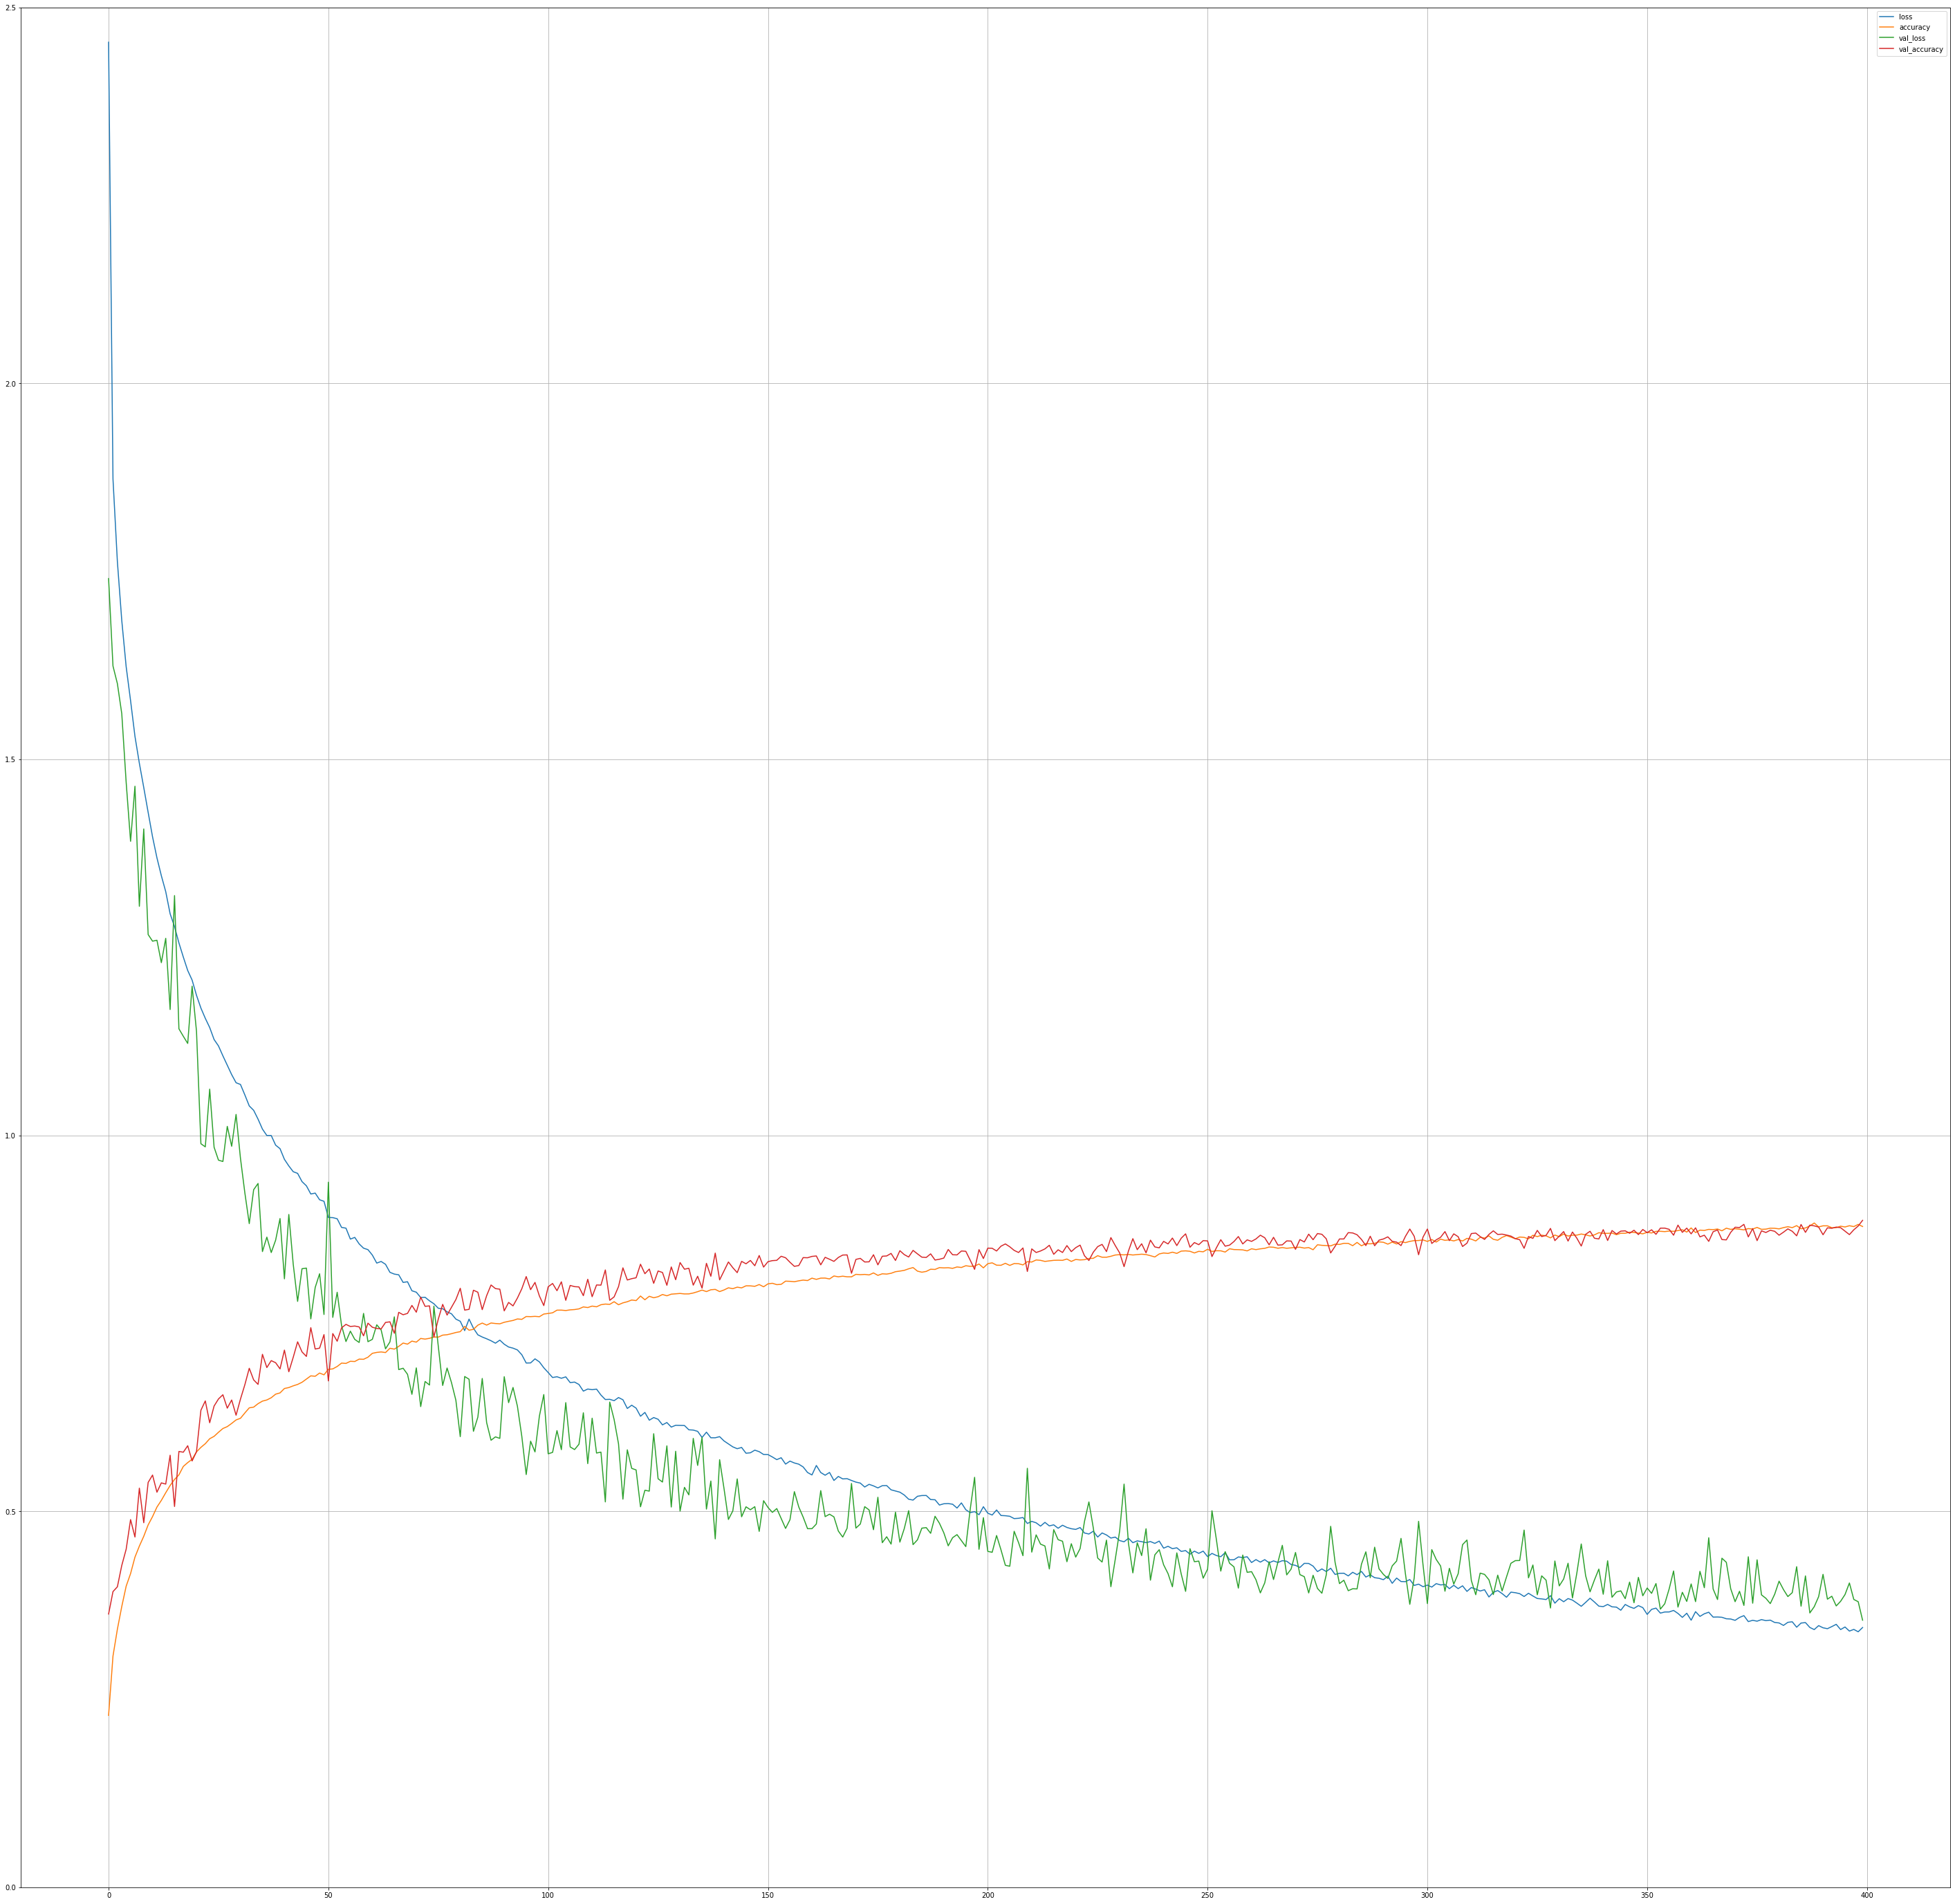

In [11]:
pd.DataFrame(history.history).plot(figsize = (50, 50))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [12]:
nmodel = keras.models.load_model("Best.h5")

In [13]:
nmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [16]:
nmodel.evaluate(test_generator, steps = 32)

32/32 [==============================] - 5s 133ms/step - loss: 0.3944 - accuracy: 0.8745


[0.39435896277427673, 0.87451171875]